# ORCA grid zonal / meridional means

## Get some data

In [1]:
# !curl -O https://zenodo.org/record/3755721/files/mesh_mask.nc

In [2]:
# !curl -O https://zenodo.org/record/3755721/files/FOCI1.14-TEST.2020.04.1_1m_20190101_20191231_grid_T.nc

## Imports

In [3]:
import xarray as xr
import numpy as np

## Load data

In [4]:
ds_mm = xr.open_dataset("mesh_mask.nc")
ds_mm = ds_mm.squeeze(drop=True)
ds_mm

<xarray.Dataset>
Dimensions:       (y: 511, x: 722, z: 46)
Dimensions without coordinates: y, x, z
Data variables: (12/44)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  float64 ...
    tmask         (z, y, x) int8 ...
    umask         (z, y, x) int8 ...
    ...            ...
    gdepv         (z, y, x) float32 ...
    gdepw_0       (z, y, x) float32 ...
    gdept_1d      (z) float64 ...
    gdepw_1d      (z) float64 ...
    e3t_1d        (z) float64 ...
    e3w_1d        (z) float64 ...

In [95]:
ds_T = xr.open_dataset("FOCI1.14-TEST.2020.04.1_1m_20190101_20191231_grid_T.nc", chunks={"time_counter": 1})
ds_T

<xarray.Dataset>
Dimensions:               (y: 511, x: 722, deptht: 46, axis_nbounds: 2,
                           time_counter: 12)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
  * deptht                (deptht) float32 3.047 9.454 ... 5.625e+03 5.875e+03
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2019-01-16T12:00:00 ....
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/17)
    deptht_bounds         (deptht, axis_nbounds) float32 dask.array<chunksize=(46, 2), meta=np.ndarray>
    votemper              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 46, 511, 722), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    vosaline              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 46, 511, 722), meta=np.ndarray>
    sosstsst              (time_counter, y, x) float32 dask.array<chunksize=(1, 511, 722), meta=np.ndarray>
    ...                    ...
    somxl010              (time_counter, y, x) float32 dask.array<chunksize=(1, 511, 722), meta=np.ndarray>
    somixhgt              (time_counter, y, x) float32 dask.array<chunksize=(1, 511, 722), meta=np.ndarray>
    sowindsp              (time_counter, y, x) float32 dask.array<chunksize=(1, 511, 722), meta=np.ndarray>
    sohefldp              (time_counter, y, x) float32 dask.array<chunksize=(1, 511, 722), meta=np.ndarray>
    sowafldp              (time_counter, y, x) float32 dask.array<chunksize=(1, 511, 722), meta=np.ndarray>
    sobowlin              (time_counter, y, x) float32 dask.array<chunksize=(1, 511, 722), meta=np.ndarray>
Attributes:
    name:         FOCI1.14-JH024_1m_20190101_20191231
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2019-Apr-18 09:38:25 CEST
    history:      Thu Apr 18 10:25:25 2019: ncks -7 -a -L 1 --cnk_dmn time,1 ...
    NCO:          4.4.8

In [96]:
sst = ds_T.sosstsst.where(ds_mm.tmaskutil == 1)
sst

<xarray.DataArray 'sosstsst' (time_counter: 12, y: 511, x: 722)>
dask.array<where, shape=(12, 511, 722), dtype=float32, chunksize=(1, 511, 722), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2019-01-16T12:00:00 ... 2019...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_surface_temperature
    long_name:           sea surface temperature
    units:               degC
    online_operation:    average
    interval_operation:  1800 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 1800 s)

In [97]:
e1e2 = (ds_mm.e1t * ds_mm.e2t).where(ds_mm.tmaskutil == 1)
e1e2

<xarray.DataArray (y: 511, x: 722)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x

In [98]:
lat2d = ds_T.nav_lat.where(ds_mm.tmaskutil == 1)
lat2d

<xarray.DataArray 'nav_lat' (y: 511, x: 722)>
dask.array<where, shape=(511, 722), dtype=float32, chunksize=(511, 722), chunktype=numpy.ndarray>
Coordinates:
    nav_lat  (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
    nav_lon  (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
Dimensions without coordinates: y, x
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north

In [99]:
lon2d = ds_T.nav_lon.where(ds_mm.tmaskutil == 1)
lon2d

<xarray.DataArray 'nav_lon' (y: 511, x: 722)>
dask.array<where, shape=(511, 722), dtype=float32, chunksize=(511, 722), chunktype=numpy.ndarray>
Coordinates:
    nav_lat  (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
    nav_lon  (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
Dimensions without coordinates: y, x
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east

In [100]:
lat2d_xmean = (lat2d * e1e2).sum("x") / e1e2.sum("x")
lat2d_xmean

<xarray.DataArray (y: 511)>
dask.array<truediv, shape=(511,), dtype=float64, chunksize=(511,), chunktype=numpy.ndarray>
Dimensions without coordinates: y

In [101]:
sst_xmean = (sst * e1e2).sum("x") / e1e2.sum("x")
sst_xmean

<xarray.DataArray (time_counter: 12, y: 511)>
dask.array<truediv, shape=(12, 511), dtype=float64, chunksize=(1, 511), chunktype=numpy.ndarray>
Coordinates:
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2019-01-16T12:00:00 ... 2019...
Dimensions without coordinates: y

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


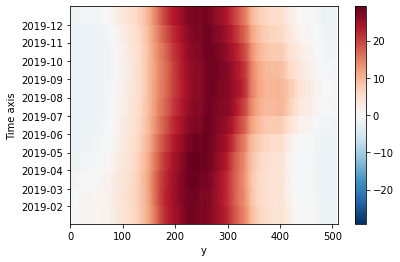

In [102]:
sst_xmean.plot()

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


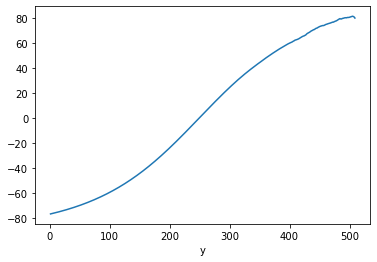

In [103]:
lat2d_xmean.plot()

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


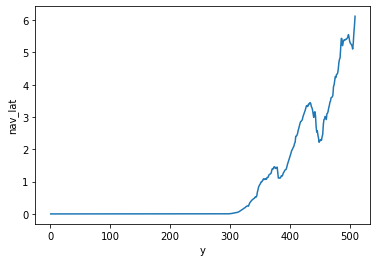

In [104]:
lat2d.std("x").plot()

In [105]:
sst_xmean = sst_xmean.assign_coords(y=lat2d_xmean)
sst_xmean

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


<xarray.DataArray (time_counter: 12, y: 511)>
dask.array<truediv, shape=(12, 511), dtype=float64, chunksize=(1, 511), chunktype=numpy.ndarray>
Coordinates:
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2019-01-16T12:00:00 ... 2019...
  * y              (y) float64 nan -76.9 -76.78 -76.67 ... 81.41 81.03 80.35 nan

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


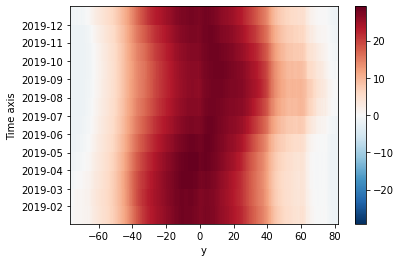

In [106]:
sst_xmean.where(~sst_xmean.coords["y"].isnull(), drop=True).sortby("y").plot()

In [107]:
from xhistogram.xarray import histogram as xhist

In [108]:
def zonal_mean_xhist(data=None, grid_cell_areas=None, lat_field=None, lat_bins=None):
    frequency = xhist(
        lat_field.rename("lat"), 
        bins=lat_bins,
        dim=["x", "y"],
    )
    numerator = xhist(
        lat_field.rename("lat"), 
        bins=lat_bins,
        weights=(data * grid_cell_areas),
        dim=["x", "y"],
    )
    denominator = xhist(
        lat_field.rename("lat"), 
        bins=lat_bins,
        weights=grid_cell_areas,
        dim=["x", "y"],
    )
    zonal_mean = numerator / denominator
    zonal_mean = zonal_mean.assign_coords(frequency=frequency)
    return zonal_mean

In [109]:
sst_zonal_mean_xhist = zonal_mean_xhist(data=sst, grid_cell_areas=e1e2, lat_field=lat2d, lat_bins=np.arange(-90, 90+2, 2))
sst_zonal_mean_xhist = sst_zonal_mean_xhist.assign_coords(time_counter=sst.time_counter)
sst_zonal_mean_xhist

<xarray.DataArray 'histogram_lat' (time_counter: 12, lat_bin: 90)>
dask.array<truediv, shape=(12, 90), dtype=float64, chunksize=(1, 90), chunktype=numpy.ndarray>
Coordinates:
  * lat_bin        (lat_bin) float64 -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
    frequency      (lat_bin) int64 dask.array<chunksize=(90,), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2019-01-16T12:00:00 ... 2019...

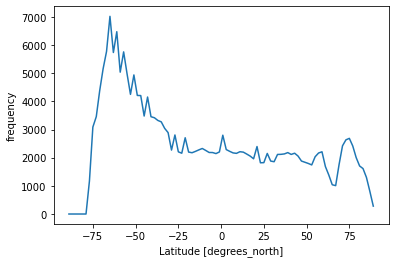

In [110]:
sst_zonal_mean_xhist.frequency.plot()

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


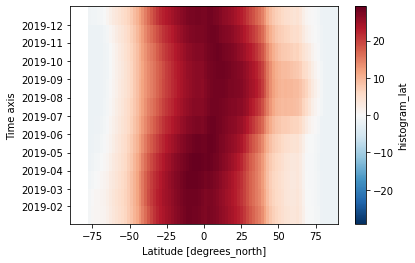

In [111]:
sst_zonal_mean_xhist.plot()

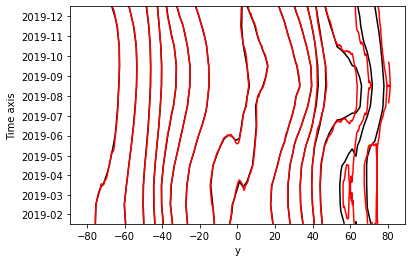

In [112]:
sst_zonal_mean_xhist.plot.contour(cmap="k", levels=20)
sst_xmean.plot.contour(cmap="r", levels=20)

In [113]:
def merid_mean_xhist(data=None, grid_cell_areas=None, lon_field=None, lon_bins=None):
    lon_field = lon_field % 360.0
    lon_bins = np.sort(lon_bins % 360)
    frequency = xhist(
        lon_field.rename("lon"), 
        bins=lon_bins,
        dim=["x", "y"],
    )
    numerator = xhist(
        lon_field.rename("lon"), 
        bins=lon_bins,
        weights=(data * grid_cell_areas),
        dim=["x", "y"],
    )
    denominator = xhist(
        lon_field.rename("lon"), 
        bins=lon_bins,
        weights=grid_cell_areas,
        dim=["x", "y"],
    )
    merid_mean = numerator / denominator
    merid_mean = merid_mean.assign_coords(frequency=frequency)
    return merid_mean

In [114]:
sst_merid_mean_xhist = merid_mean_xhist(data=sst, grid_cell_areas=e1e2, lon_field=lon2d, lon_bins=np.arange(0, 360+2, 2))
sst_merid_mean_xhist = sst_merid_mean_xhist.assign_coords(time_counter=sst.time_counter)
sst_merid_mean_xhist

<xarray.DataArray 'histogram_lon' (time_counter: 12, lon_bin: 180)>
dask.array<truediv, shape=(12, 180), dtype=float64, chunksize=(1, 180), chunktype=numpy.ndarray>
Coordinates:
  * lon_bin        (lon_bin) float64 0.0 1.0 3.0 5.0 ... 351.0 353.0 355.0 357.0
    frequency      (lon_bin) int64 dask.array<chunksize=(180,), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2019-01-16T12:00:00 ... 2019...

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


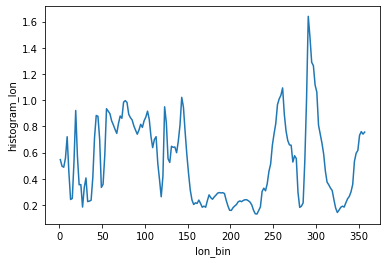

In [115]:
sst_merid_mean_xhist.std("time_counter").plot()

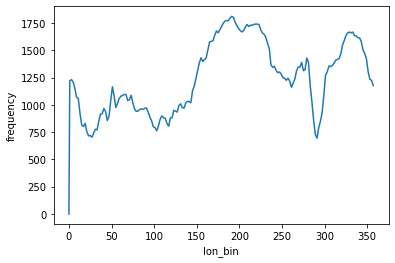

In [90]:
sst_merid_mean_xhist.frequency.plot()

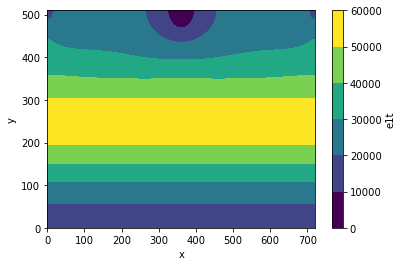

In [94]:
ds_mm.e1t.plot.contourf()